In [24]:
import pandas as pd
import sklearn.linear_model as lm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
# Membaca Data
df = pd.read_csv('ump_jateng.csv')
print(df)

         daerah  tahun      ump
0   JAWA TENGAH   1997   113000
1   JAWA TENGAH   1998   130000
2   JAWA TENGAH   1999   153000
3   JAWA TENGAH   2000   185000
4   JAWA TENGAH   2001   245000
5   JAWA TENGAH   2002   314500
6   JAWA TENGAH   2003   340400
7   JAWA TENGAH   2004   365000
8   JAWA TENGAH   2005   390000
9   JAWA TENGAH   2006   450000
10  JAWA TENGAH   2007   500000
11  JAWA TENGAH   2008   547000
12  JAWA TENGAH   2009   575000
13  JAWA TENGAH   2010   660000
14  JAWA TENGAH   2011   675000
15  JAWA TENGAH   2012   765000
16  JAWA TENGAH   2013   830000
17  JAWA TENGAH   2014   910000
18  JAWA TENGAH   2015   910000
19  JAWA TENGAH   2016   910000
20  JAWA TENGAH   2017  1367000
21  JAWA TENGAH   2018  1486065
22  JAWA TENGAH   2019  1605396
23  JAWA TENGAH   2020  1742015
24  JAWA TENGAH   2021  1798979
25  JAWA TENGAH   2022  1813011


In [26]:
# memanggil Fungsi
lr = lm.LinearRegression()

x = df.tahun.values.reshape(-1,1)
y = df.ump.values.reshape(-1,1)

lr.fit(x,y)

LinearRegression()

In [27]:
# Output
print("[INFO]")
print('Intercept : ', lr.intercept_)
print('Coefisien : ', lr.coef_)
print("\n[PERSAMAAN]")
print('jadi persaman yg terbentuk adalah : Y = ', lr.intercept_ , ' + ', lr.coef_, 'X')
print("\n[PREDIKSI]")
print('prediksi untuk UMP(X) = 2025  maka nilai UMP(Y) = ', lr.predict([[2025]]))

print("\n[MANUAL]")

[INFO]
Intercept :  [-1.37096437e+08]
Coefisien :  [[68602.74735043]]

[PERSAMAAN]
jadi persaman yg terbentuk adalah : Y =  [-1.37096437e+08]  +  [[68602.74735043]] X

[PREDIKSI]
prediksi untuk UMP(X) = 2025  maka nilai UMP(Y) =  [[1824125.89162394]]

[MANUAL]


In [28]:
# Evaluasi predict
df['prediksi_ump'] = lr.predict(x)

In [29]:
# Evaluasi Manual
df['SST']= np.square(df['ump'] - df['ump'].mean())
df['SSR']= np.square(df['prediksi_ump'] - df['ump'].mean())
print('SSR=', df['SSR'].sum())
print('SST=', df['SST'].sum())
print('perhitungan scr manual R-square = ', df['SSR'].sum() / df['SST'].sum())

SSR= 6883017780638.862
SST= 7543172226983.539
perhitungan scr manual R-square =  0.9124831799566815


In [30]:
# Evaluasi Built in Function
print('R-Squared dengan fungsi : ', r2_score(df.ump, df.prediksi_ump))
print('Mean Absolute Error : ', mean_absolute_error(df.ump, df.prediksi_ump))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(df.ump, df.prediksi_ump)))

R-Squared dengan fungsi :  0.9124831799566769
Mean Absolute Error :  142238.52752136954
Root Mean Squared Error :  159344.14212214618


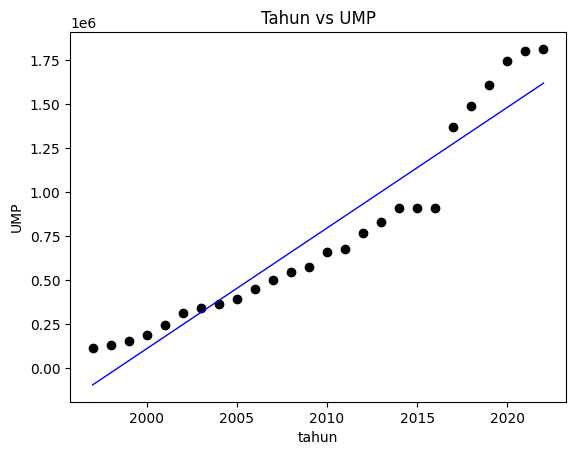

In [31]:
# Grafik
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 1)
plt.title('Tahun vs UMP')
plt.ylabel('UMP')
plt.xlabel('tahun')
plt.show()

In [32]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))